In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D


width = 16
height = 16

def generate_dataset(samples):

    ds_x = []
    ds_y = []
    
    for it in range(samples):
        
        num_pt = np.random.randint(0, width * height)
        img = generate_image(num_pt)
        
        ds_y.append(num_pt)
        ds_x.append(img)
    
    return np.array(ds_x), np.array(ds_y).reshape(samples, 1)
    
def generate_image(points):
    
    img = np.zeros((width, height))
    pts = np.random.random((points, 2))
    
    for ipt in pts:
        img[int(ipt[0] * width), int(ipt[1] * height)] = 1
    
    return img.reshape(width, height, 1)

In [21]:
x_train, y_train = generate_dataset(1500)
x_val, y_val = generate_dataset(300)
x_test, y_test = generate_dataset(100)

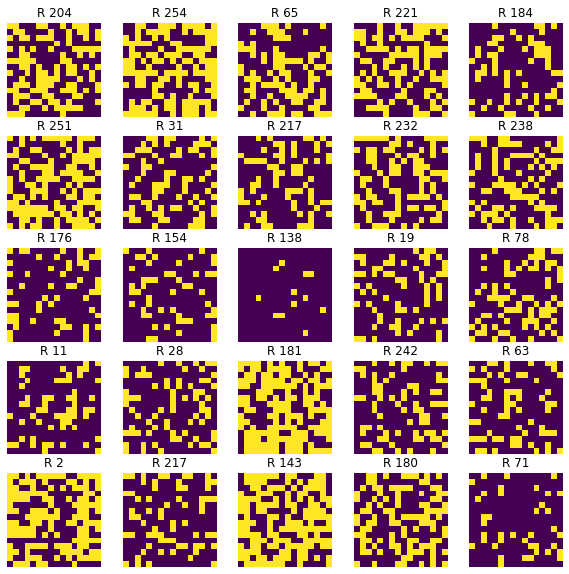

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R ' + str(y_train[i][0]))

plt.show()

In [40]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape=(width, height, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1)
])

In [41]:
model.compile(loss='mse', optimizer ='adam')

In [42]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=1000, validation_data=(x_val, y_val))

Train on 1500 samples, validate on 300 samples
Epoch 1/1000
1500/1500 [==============================] - 0s 158us/step - loss: 12249.5725 - val_loss: 2199.5551
Epoch 2/1000
1500/1500 [==============================] - 0s 103us/step - loss: 1644.6412 - val_loss: 1398.1442
Epoch 3/1000
1500/1500 [==============================] - 0s 101us/step - loss: 1169.1340 - val_loss: 1076.6439
Epoch 4/1000
1500/1500 [==============================] - 0s 102us/step - loss: 912.9420 - val_loss: 862.4930
Epoch 5/1000
1500/1500 [==============================] - 0s 102us/step - loss: 703.1051 - val_loss: 626.2846
Epoch 6/1000
1500/1500 [==============================] - 0s 101us/step - loss: 495.3815 - val_loss: 400.1759
Epoch 7/1000
1500/1500 [==============================] - 0s 106us/step - loss: 342.0141 - val_loss: 317.7526
Epoch 8/1000
1500/1500 [==============================] - 0s 103us/step - loss: 308.3029 - val_loss: 271.8896
Epoch 9/1000
1500/1500 [==============================] - 0s 102us

1500/1500 [==============================] - 0s 101us/step - loss: 91.0490 - val_loss: 157.6409
Epoch 75/1000
1500/1500 [==============================] - 0s 101us/step - loss: 87.2832 - val_loss: 182.3200
Epoch 76/1000
1500/1500 [==============================] - 0s 101us/step - loss: 83.0889 - val_loss: 154.7335
Epoch 77/1000
1500/1500 [==============================] - 0s 102us/step - loss: 86.1530 - val_loss: 192.4208
Epoch 78/1000
1500/1500 [==============================] - 0s 102us/step - loss: 92.8606 - val_loss: 162.4576
Epoch 79/1000
1500/1500 [==============================] - 0s 101us/step - loss: 78.6303 - val_loss: 154.7422
Epoch 80/1000
1500/1500 [==============================] - 0s 100us/step - loss: 82.2438 - val_loss: 152.9539
Epoch 81/1000
1500/1500 [==============================] - 0s 102us/step - loss: 76.4211 - val_loss: 151.8731
Epoch 82/1000
1500/1500 [==============================] - 0s 101us/step - loss: 81.6769 - val_loss: 150.1448
Epoch 83/1000
1500/1500 

1500/1500 [==============================] - 0s 85us/step - loss: 27.9141 - val_loss: 174.9609
Epoch 149/1000
1500/1500 [==============================] - 0s 90us/step - loss: 23.3569 - val_loss: 175.9874
Epoch 150/1000
1500/1500 [==============================] - 0s 86us/step - loss: 22.4037 - val_loss: 174.4311
Epoch 151/1000
1500/1500 [==============================] - 0s 88us/step - loss: 30.2652 - val_loss: 181.4900
Epoch 152/1000
1500/1500 [==============================] - 0s 87us/step - loss: 21.3311 - val_loss: 176.8036
Epoch 153/1000
1500/1500 [==============================] - 0s 91us/step - loss: 23.4032 - val_loss: 178.1442
Epoch 154/1000
1500/1500 [==============================] - 0s 90us/step - loss: 23.9197 - val_loss: 182.4132
Epoch 155/1000
1500/1500 [==============================] - 0s 91us/step - loss: 21.3039 - val_loss: 185.5527
Epoch 156/1000
1500/1500 [==============================] - 0s 86us/step - loss: 24.6525 - val_loss: 179.3284
Epoch 157/1000
1500/1500 

Epoch 223/1000
1500/1500 [==============================] - 0s 84us/step - loss: 8.4447 - val_loss: 202.5827
Epoch 224/1000
1500/1500 [==============================] - 0s 86us/step - loss: 5.5630 - val_loss: 201.0519
Epoch 225/1000
1500/1500 [==============================] - 0s 84us/step - loss: 4.1306 - val_loss: 200.4133
Epoch 226/1000
1500/1500 [==============================] - 0s 84us/step - loss: 4.2134 - val_loss: 202.9637
Epoch 227/1000
1500/1500 [==============================] - 0s 84us/step - loss: 4.0495 - val_loss: 201.0814
Epoch 228/1000
1500/1500 [==============================] - 0s 88us/step - loss: 3.6025 - val_loss: 201.8612
Epoch 229/1000
1500/1500 [==============================] - 0s 87us/step - loss: 4.0221 - val_loss: 202.7276
Epoch 230/1000
1500/1500 [==============================] - 0s 86us/step - loss: 3.5459 - val_loss: 204.3848
Epoch 231/1000
1500/1500 [==============================] - 0s 89us/step - loss: 3.7631 - val_loss: 202.7384
Epoch 232/1000
1500

1500/1500 [==============================] - 0s 89us/step - loss: 0.6680 - val_loss: 211.1972
Epoch 299/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.8889 - val_loss: 217.6181
Epoch 300/1000
1500/1500 [==============================] - 0s 89us/step - loss: 1.4397 - val_loss: 211.1640
Epoch 301/1000
1500/1500 [==============================] - 0s 91us/step - loss: 2.9104 - val_loss: 214.0426
Epoch 302/1000
1500/1500 [==============================] - 0s 88us/step - loss: 1.0765 - val_loss: 212.5456
Epoch 303/1000
1500/1500 [==============================] - 0s 89us/step - loss: 1.8972 - val_loss: 208.2047
Epoch 304/1000
1500/1500 [==============================] - 0s 94us/step - loss: 1.1956 - val_loss: 209.3693
Epoch 305/1000
1500/1500 [==============================] - 0s 93us/step - loss: 0.7163 - val_loss: 210.3546
Epoch 306/1000
1500/1500 [==============================] - 0s 87us/step - loss: 0.6505 - val_loss: 209.9050
Epoch 307/1000
1500/1500 [========

1500/1500 [==============================] - 0s 84us/step - loss: 0.4575 - val_loss: 211.9162
Epoch 374/1000
1500/1500 [==============================] - 0s 86us/step - loss: 0.4027 - val_loss: 210.6615
Epoch 375/1000
1500/1500 [==============================] - 0s 83us/step - loss: 2.6682 - val_loss: 217.0457
Epoch 376/1000
1500/1500 [==============================] - 0s 85us/step - loss: 3.0635 - val_loss: 213.3709
Epoch 377/1000
1500/1500 [==============================] - 0s 83us/step - loss: 0.9438 - val_loss: 211.1708
Epoch 378/1000
1500/1500 [==============================] - 0s 84us/step - loss: 0.9772 - val_loss: 211.5627
Epoch 379/1000
1500/1500 [==============================] - 0s 84us/step - loss: 0.5697 - val_loss: 210.5399
Epoch 380/1000
1500/1500 [==============================] - 0s 84us/step - loss: 0.3283 - val_loss: 210.7119
Epoch 381/1000
1500/1500 [==============================] - 0s 86us/step - loss: 0.6538 - val_loss: 211.5097
Epoch 382/1000
1500/1500 [========

1500/1500 [==============================] - 0s 88us/step - loss: 0.5788 - val_loss: 211.1533
Epoch 449/1000
1500/1500 [==============================] - 0s 108us/step - loss: 0.3912 - val_loss: 210.4637
Epoch 450/1000
1500/1500 [==============================] - 0s 88us/step - loss: 0.4609 - val_loss: 211.9415
Epoch 451/1000
1500/1500 [==============================] - 0s 84us/step - loss: 0.7470 - val_loss: 212.8860
Epoch 452/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.5657 - val_loss: 210.0490
Epoch 453/1000
1500/1500 [==============================] - 0s 81us/step - loss: 0.3986 - val_loss: 210.9088
Epoch 454/1000
1500/1500 [==============================] - 0s 79us/step - loss: 1.2606 - val_loss: 212.0500
Epoch 455/1000
1500/1500 [==============================] - 0s 81us/step - loss: 2.7168 - val_loss: 212.8159
Epoch 456/1000
1500/1500 [==============================] - 0s 79us/step - loss: 2.4900 - val_loss: 213.8989
Epoch 457/1000
1500/1500 [=======

1500/1500 [==============================] - 0s 79us/step - loss: 0.3946 - val_loss: 210.5927
Epoch 524/1000
1500/1500 [==============================] - 0s 80us/step - loss: 0.5744 - val_loss: 209.8391
Epoch 525/1000
1500/1500 [==============================] - 0s 78us/step - loss: 0.6922 - val_loss: 210.1643
Epoch 526/1000
1500/1500 [==============================] - 0s 79us/step - loss: 0.6308 - val_loss: 210.7982
Epoch 527/1000
1500/1500 [==============================] - 0s 81us/step - loss: 0.8081 - val_loss: 214.0380
Epoch 528/1000
1500/1500 [==============================] - 0s 85us/step - loss: 0.8454 - val_loss: 212.9658
Epoch 529/1000
1500/1500 [==============================] - 0s 86us/step - loss: 1.0839 - val_loss: 209.8168
Epoch 530/1000
1500/1500 [==============================] - 0s 86us/step - loss: 3.3400 - val_loss: 215.9378
Epoch 531/1000
1500/1500 [==============================] - 0s 85us/step - loss: 3.3137 - val_loss: 223.5535
Epoch 532/1000
1500/1500 [========

1500/1500 [==============================] - 0s 90us/step - loss: 0.6313 - val_loss: 207.5952
Epoch 599/1000
1500/1500 [==============================] - 0s 94us/step - loss: 1.0778 - val_loss: 210.0875
Epoch 600/1000
1500/1500 [==============================] - 0s 92us/step - loss: 1.2725 - val_loss: 210.4265
Epoch 601/1000
1500/1500 [==============================] - 0s 88us/step - loss: 0.9194 - val_loss: 208.6097
Epoch 602/1000
1500/1500 [==============================] - 0s 88us/step - loss: 0.8192 - val_loss: 210.0417
Epoch 603/1000
1500/1500 [==============================] - 0s 88us/step - loss: 0.9474 - val_loss: 208.4427
Epoch 604/1000
1500/1500 [==============================] - 0s 91us/step - loss: 0.9323 - val_loss: 211.0536
Epoch 605/1000
1500/1500 [==============================] - 0s 89us/step - loss: 1.9109 - val_loss: 210.5038
Epoch 606/1000
1500/1500 [==============================] - 0s 89us/step - loss: 1.0338 - val_loss: 210.3166
Epoch 607/1000
1500/1500 [========

1500/1500 [==============================] - 0s 92us/step - loss: 0.6755 - val_loss: 207.8320
Epoch 674/1000
1500/1500 [==============================] - 0s 90us/step - loss: 0.3574 - val_loss: 207.6113
Epoch 675/1000
1500/1500 [==============================] - 0s 87us/step - loss: 0.2938 - val_loss: 208.0087
Epoch 676/1000
1500/1500 [==============================] - 0s 86us/step - loss: 0.1914 - val_loss: 207.6564
Epoch 677/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.2275 - val_loss: 208.2352
Epoch 678/1000
1500/1500 [==============================] - 0s 91us/step - loss: 0.1226 - val_loss: 208.4572
Epoch 679/1000
1500/1500 [==============================] - 0s 90us/step - loss: 0.0976 - val_loss: 207.6882
Epoch 680/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.0709 - val_loss: 207.5721
Epoch 681/1000
1500/1500 [==============================] - 0s 90us/step - loss: 0.0671 - val_loss: 208.1627
Epoch 682/1000
1500/1500 [========

1500/1500 [==============================] - 0s 91us/step - loss: 0.1663 - val_loss: 207.9029
Epoch 749/1000
1500/1500 [==============================] - 0s 91us/step - loss: 1.2202 - val_loss: 206.7966
Epoch 750/1000
1500/1500 [==============================] - 0s 90us/step - loss: 1.3845 - val_loss: 208.1584
Epoch 751/1000
1500/1500 [==============================] - 0s 91us/step - loss: 5.6564 - val_loss: 217.4017
Epoch 752/1000
1500/1500 [==============================] - 0s 91us/step - loss: 7.9417 - val_loss: 211.3256
Epoch 753/1000
1500/1500 [==============================] - 0s 91us/step - loss: 2.0865 - val_loss: 211.3695
Epoch 754/1000
1500/1500 [==============================] - 0s 91us/step - loss: 2.8016 - val_loss: 207.0067
Epoch 755/1000
1500/1500 [==============================] - 0s 90us/step - loss: 0.9870 - val_loss: 206.0404
Epoch 756/1000
1500/1500 [==============================] - 0s 91us/step - loss: 0.4428 - val_loss: 207.2844
Epoch 757/1000
1500/1500 [========

1500/1500 [==============================] - 0s 92us/step - loss: 0.1889 - val_loss: 208.0390
Epoch 824/1000
1500/1500 [==============================] - 0s 94us/step - loss: 0.1892 - val_loss: 206.4510
Epoch 825/1000
1500/1500 [==============================] - ETA: 0s - loss: 0.211 - 0s 93us/step - loss: 0.1977 - val_loss: 207.4100
Epoch 826/1000
1500/1500 [==============================] - 0s 91us/step - loss: 0.1195 - val_loss: 206.4936
Epoch 827/1000
1500/1500 [==============================] - 0s 96us/step - loss: 0.0810 - val_loss: 206.5533
Epoch 828/1000
1500/1500 [==============================] - 0s 95us/step - loss: 0.1006 - val_loss: 206.9596
Epoch 829/1000
1500/1500 [==============================] - 0s 89us/step - loss: 2.5668 - val_loss: 207.0555
Epoch 830/1000
1500/1500 [==============================] - 0s 92us/step - loss: 3.2405 - val_loss: 207.5674
Epoch 831/1000
1500/1500 [==============================] - 0s 90us/step - loss: 1.2899 - val_loss: 204.2918
Epoch 832/

1500/1500 [==============================] - 0s 86us/step - loss: 0.8742 - val_loss: 207.5141
Epoch 899/1000
1500/1500 [==============================] - 0s 109us/step - loss: 0.6402 - val_loss: 205.9934
Epoch 900/1000
1500/1500 [==============================] - 0s 97us/step - loss: 0.3151 - val_loss: 206.0908
Epoch 901/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.3582 - val_loss: 204.6915
Epoch 902/1000
1500/1500 [==============================] - 0s 83us/step - loss: 1.1151 - val_loss: 209.6787
Epoch 903/1000
1500/1500 [==============================] - 0s 96us/step - loss: 2.9201 - val_loss: 206.9228
Epoch 904/1000
1500/1500 [==============================] - 0s 75us/step - loss: 1.5680 - val_loss: 205.5207
Epoch 905/1000
1500/1500 [==============================] - 0s 77us/step - loss: 0.5555 - val_loss: 206.9062
Epoch 906/1000
1500/1500 [==============================] - 0s 82us/step - loss: 0.5184 - val_loss: 207.1335
Epoch 907/1000
1500/1500 [=======

1500/1500 [==============================] - 0s 89us/step - loss: 1.0758 - val_loss: 204.7828
Epoch 974/1000
1500/1500 [==============================] - 0s 88us/step - loss: 0.8988 - val_loss: 206.5477
Epoch 975/1000
1500/1500 [==============================] - 0s 86us/step - loss: 1.1630 - val_loss: 205.7985
Epoch 976/1000
1500/1500 [==============================] - 0s 90us/step - loss: 0.6600 - val_loss: 205.5916
Epoch 977/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.3661 - val_loss: 205.5413
Epoch 978/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.2632 - val_loss: 205.2336
Epoch 979/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.1622 - val_loss: 204.9644
Epoch 980/1000
1500/1500 [==============================] - 0s 89us/step - loss: 0.2669 - val_loss: 204.8017
Epoch 981/1000
1500/1500 [==============================] - 0s 88us/step - loss: 0.6358 - val_loss: 204.6794
Epoch 982/1000
1500/1500 [========

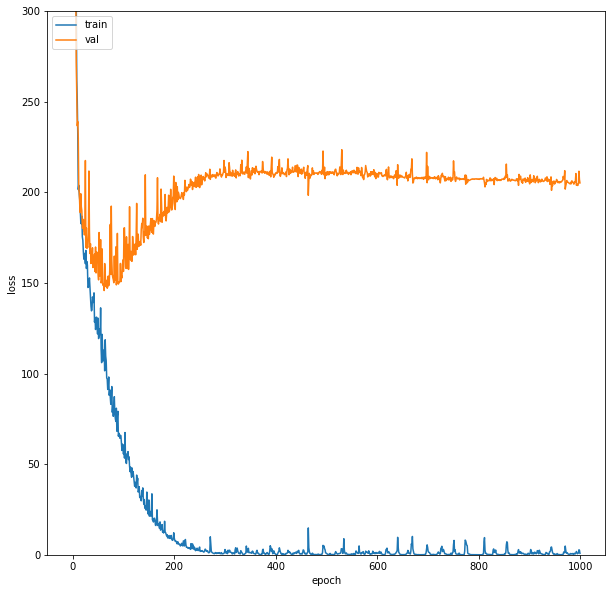

In [43]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.0, 300.0)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
score = model.evaluate(x_test, y_test, batch_size=32)

100/100 [==============================] - 0s 50us/step


In [45]:
print(score)

155.5682009124756


In [46]:
yhat_test= model.predict(x_test, batch_size=32)

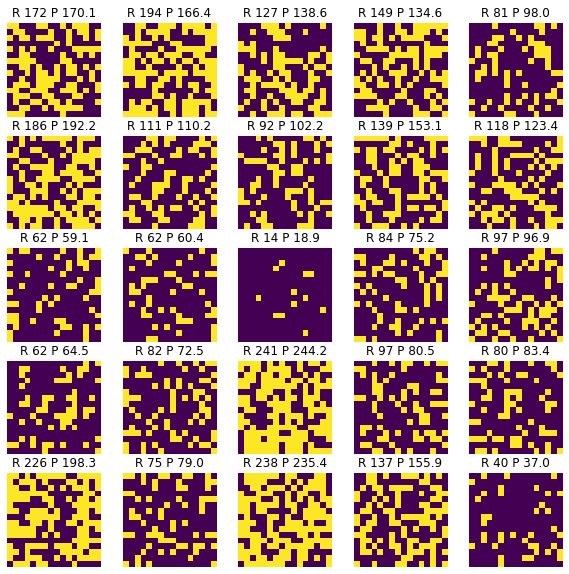

In [47]:
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr= plt.subplots(plt_row, plt_col)
for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    sub_plt.set_title('R %d P %.1f' % (y_test[i][0], yhat_test[i][0]))
    
plt.show()